<h2 style="color:crimson">Ejercicio</h2>

Encuentra un mejor modelo que el encotrado por `gsearch.best_estimator_`

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from ipywidgets import interact, FloatSlider
from numpy.random import seed, randn

# Ejemplo: [Seatle Housing](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [3]:
import pandas as pd
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
housing.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

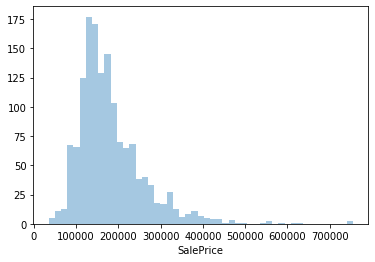

In [6]:
sns.distplot(housing.SalePrice, kde=False)

In [8]:
housing

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### SimpleImputer

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
xvals = np.array([[1, 2, 3, np.nan, 3, 3, 4]]).T
imputer = SimpleImputer()
imputer.fit_transform(xvals)

array([[1.        ],
       [2.        ],
       [3.        ],
       [2.66666667],
       [3.        ],
       [3.        ],
       [4.        ]])

In [11]:
ytest = np.array([[1, 1, 1, np.nan]]).T
imputer.transform(ytest)

array([[1.        ],
       [1.        ],
       [1.        ],
       [2.66666667]])

In [12]:
np.nanmean(xvals)

2.6666666666666665

### OneHotEncoder

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
housing["SaleCondition"]

0        Normal
1        Normal
2        Normal
3       Abnorml
4        Normal
         ...   
1455     Normal
1456     Normal
1457     Normal
1458     Normal
1459     Normal
Name: SaleCondition, Length: 1460, dtype: object

In [15]:
lb = OneHotEncoder(sparse=False)
lb.fit_transform(housing[["SaleCondition"]])

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

## ColumnTransformer 

In [16]:
from sklearn.compose import ColumnTransformer

In [17]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [18]:
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"])]
)

columns_ohe = column_selector.fit_transform(housing)
columns_ohe

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [19]:
columns_ohe.shape

(1460, 11)

In [20]:
housing["MSZoning"].value_counts().shape[0] + housing["SaleCondition"].value_counts().shape[0]

11

In [21]:
column_selector.get_feature_names()

['label_bin__x0_C (all)',
 'label_bin__x0_FV',
 'label_bin__x0_RH',
 'label_bin__x0_RL',
 'label_bin__x0_RM',
 'label_bin__x1_Abnorml',
 'label_bin__x1_AdjLand',
 'label_bin__x1_Alloca',
 'label_bin__x1_Family',
 'label_bin__x1_Normal',
 'label_bin__x1_Partial']

### Incluyendo Variables Numéricas

In [22]:
from sklearn.compose import make_column_selector

In [23]:
housing.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [24]:
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

X = column_selector.fit_transform(housing)
X

array([[   0.,    0.,    0., ...,   65.,  196., 2003.],
       [   0.,    0.,    0., ...,   80.,    0., 1976.],
       [   0.,    0.,    0., ...,   68.,  162., 2001.],
       ...,
       [   0.,    0.,    0., ...,   66.,    0., 1941.],
       [   0.,    0.,    0., ...,   68.,    0., 1950.],
       [   0.,    0.,    0., ...,   75.,    0., 1965.]])

### Creando un _pipeline_ para regresión lineal con polinomio

In [44]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [89]:
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

pipe = Pipeline([
    ("select_cols", column_selector),
    ("poly_transform", PolynomialFeatures(degree=3, include_bias=True)),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

## Entrenando al modelo

In [90]:
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

pipe.fit(xtrain, ytrain)

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [91]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.36
mean mae: 41,166.70


# El error cuadrático medio es mejor con este modelo que el presentado con Lasso como se ve abajo.

### Creando un _pipeline_ para un Lasso

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_validate, train_test_split

In [41]:
column_selector = ColumnTransformer(
    [("label_bin", OneHotEncoder(sparse=False), ["MSZoning", "SaleCondition"]),
     ("numeric", SimpleImputer(), make_column_selector(dtype_include="float"))]
)

pipe = Pipeline([
    ("select_cols", column_selector),
    ("lasso", Lasso(alpha=0.1, tol=0.5))
])

## Entrenando un primer modelo

In [42]:
train, test = train_test_split(housing, test_size=0.2, random_state=2718)
xtrain, ytrain = train.drop("SalePrice", axis=1), train["SalePrice"]

cv = cross_validate(pipe, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [43]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.44
mean mae: 41,749.60


## Seleccionando un óptimo local

In [42]:
from sklearn.model_selection import GridSearchCV

alphas = [1/i for i in range(1, 11)]
grid = {
    "lasso__alpha": [0.1 * 10 ** (i/2) for i in range(1, 11)],
}

In [43]:
%%time
gsearch = GridSearchCV(pipe, grid, scoring="neg_mean_absolute_error",
                       return_train_score=True, cv=10)
gsearch.fit(xtrain, ytrain)
cvres = gsearch.cv_results_

Wall time: 6.94 s


In [45]:
cv = cross_validate(gsearch.best_estimator_, xtrain, ytrain, cv=5, scoring=["r2", "neg_mean_absolute_error"])
r2 = cv["test_r2"]
mae = -cv["test_neg_mean_absolute_error"]

In [46]:
print(f"mean r2: {r2.mean():0.2f}")
print(f"mean mae: {mae.mean():,.2f}")

mean r2: 0.44
mean mae: 41,620.65


In [47]:
gsearch.best_estimator_.named_steps["lasso"].coef_

array([    -0.        ,   4314.16282184,     -0.        ,  13737.27173146,
        -5914.14187899, -19423.32123352,     -0.        ,      0.        ,
           -0.        ,     -0.        ,  41155.4840491 ,    661.53994491,
          150.74482758,    981.09128146])